- 공분산 : 2개의 확률변수의 상관정도를 나타내는 값
  - 두 변수의 편차를 곱한 것의 평균
    - 편차 = 실데이터 - 평균
  - numpy.cov()로 계산가능

- 공분산의 해석
  - 공분산이 양수이면 두 변수가 같은 방향으로 변화 (정비례)
  - 공분산이 음수이면 두 변수가 반대 방향으로 변화 (반비례)
  - 공분산이 0이면 두 변수가 서로 독립 (어떤 영향도 주지 않음, 한 변수의 변화로 다른 변수의 변화를 예측 할 수 없음)
  - 구체적으로 얼만큼 영향을 주는지 알기는 어려움

- 상관관계 : 두 변수간의 관계
  - 상관계수 : 공분산을 표준화시킨 값 (정형화된 공분산)
- 상관분석 : 두 변수간의 선형관계 여부를 추론하는 가설검정
  - 귀무가설 : 두 변수는 상관관계가 없다.
  - 대립가설 : 두 변수는 상관관계가 있다.

- 단일 변수의 산포정도 : 분산
- 두 개 변수의 산포정도 : 공분산, 상관계수

- 상관계수
  - 부호
    - 양수 : 정비례
    - 음수 : 반비례
  - 절대값
    - 0으로 갈수록 약하고 1로 갈수록 강하다

- 상관분석의 가정
  - 선형성 : X가 증가할때 Y도 증가하거나 감소하는 형태가 선형으로 분포되어야 함
    - 선형성이 충족되면 진행되는 분석단계가 1차 함수로 표현
    - 곡선형태로 분포하게 될 경우 상관계수가 0에 가까워짐
      - 이 경우 비선형 분석을 시행 (2차 이상의 함수로 표현)
    - 선형성이 확보되지 않을 경우 이후 단계에서 다항회귀분석 등을 시도할 수 있으나 변수 변환 (로그 ,제곱, 표준화 등)을 적용하여 선형으로 변형한 후 사용
    - 선형성은 산점도 그래프 시각화를 통해 확인
  - 등분산성 : X와 Y가 등분산성을 충족해야 함
    - X가 변해감에 따라 Y의 흩어지는 정도가 넓으면 상관관계가 낮아짐
      - 등분산성을 충족하기 위해서는 X와 Y가 정규분포를 충족해야 함

- 피어슨 상관계수
  - 선형적인 상관계수를 측정
  - 공분산을 두 변수의 표준편차로 나눈 값
  - 연속형 변수, 정규성 가정이 충족되는 변수에 사용
- 스피어만 상관계수
  - 서열척도인 두 변수들의 상관관계를 측정
  - 순서형 변수, 비모수적 방법에 해당

In [31]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
import sys

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

- 피어슨 상관분석
  - 데이터는 정규성과 등분산성 충족 가정

In [3]:
df1 = pd.read_excel("./data/point.xlsx")
df1.head()

,언어영역,수리영역
0,392,428
1,404,518
2,346,376
3,382,426
4,368,409


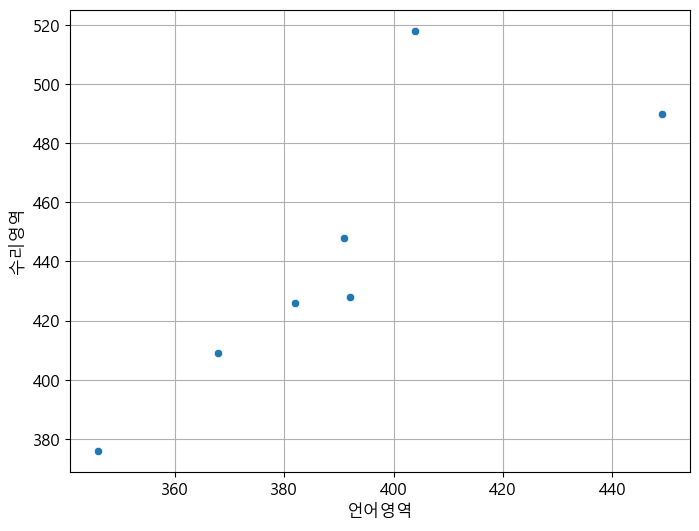

In [4]:
sns.scatterplot(data = df1, x = '언어영역', y = '수리영역')
plt.grid()
plt.show()
plt.close()

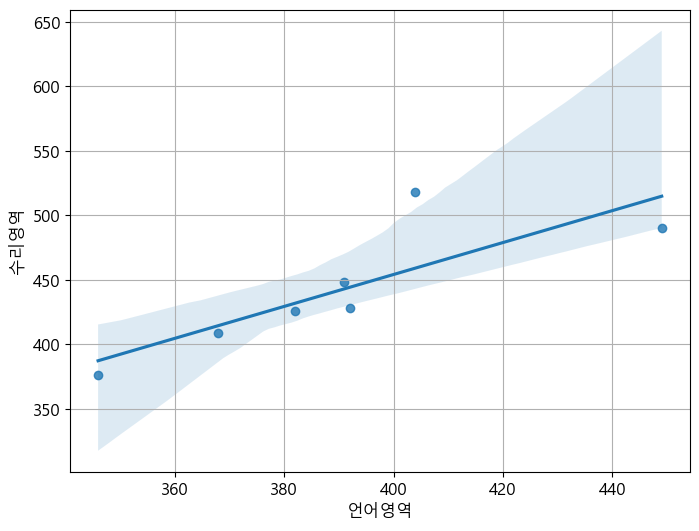

In [5]:
sns.regplot(data=df1, x='언어영역', y='수리영역')
plt.grid()
plt.show()
plt.close()

- scatterplot : 추세선 사용 불가, hue 파라미터 사용가능
- regplot : 추세선 자동 출력, hue 파라미터 사용불가
- lmplot : 추세선 사용 가능, hue 파라미터 사용 가능, plt.figure() 초기화 사용안함

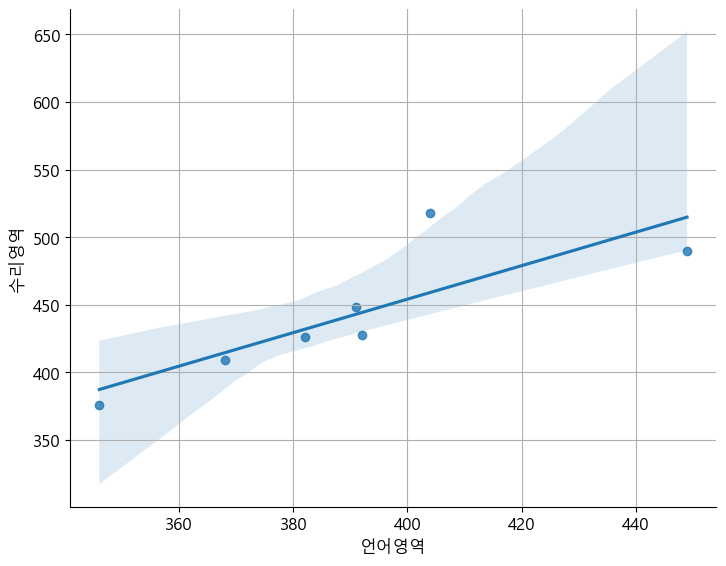

In [6]:
g = sns.lmplot(data = df1, x = '언어영역', y = '수리영역')
g.fig.set_figheight(6)
g.fig.set_figwidth(8)
g.fig.set_dpi(100)

plt.grid()
plt.show()

- 공분산
  - 상관관계의 상승 또는 하강 관계는 이해할 수 있으나 측정 단위의 크기에 다라 값이 다르므로 절대적 정도 파악은 한계가 있음
  - 해당 사유로 사용 빈도가 낮음
    - np.cov는 2차원 배열이 리턴되며 공분산 값은 0행 1열 or 1행 0열 값

In [7]:
c = np.cov(df1['언어영역'], df1['수리영역'])
c

array([[1027.57142857, 1271.95238095],
       [1271.95238095, 2335.47619048]])

In [8]:
f"공분산 = {c[0, 1]}"

'공분산 = 1271.9523809523807'

- 상관분석
  - 상관계수 도출
  - np.corrcoef는 상관행렬을 반환함

In [9]:
c = np.corrcoef(df1['언어영역'], df1['수리영역'])
c

array([[1.        , 0.82106421],
       [0.82106421, 1.        ]])

In [10]:
f"상관계수 = {c[0, 1]}"

'상관계수 = 0.821064207442306'

- 피어슨 상관계수의 p-value 계산
  - scipy.stats.pearsonr 사용
    - 검정통계량이 상관계수이며, p-value가 해당 상관분석에 대한 가설검정 결과
      - 귀무가설 : 상관관계 없음
      - 대립가설 : 상관관계 있음

In [11]:
r, p = pearsonr(df1['언어영역'], df1['수리영역'])
f"상관계수 : {r}, p-value : {p}"

'상관계수 : 0.8210642074423062, p-value : 0.023563708235834223'

- 데이터프레임 객체의 corr
  - p-value는 확인 불가
    - scipy 패키지의 pearsonr 함수로 상관계수와 p-value를 먼저 확인하고 대립가설 채택 후 시각화를 위해 해당 기능 사용

In [12]:
corr = df1.corr(method = 'pearson')
corr

,언어영역,수리영역
언어영역,1.000000,0.821064
수리영역,0.821064,1.000000


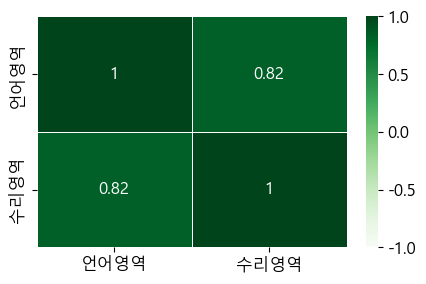

In [14]:
plt.figure(figsize = (5, 3))

sns.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()

In [15]:
df2 = pd.read_csv("./data/r_dataisbeautiful_posts.csv")

In [16]:
df2.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,ll1p9h,Wordcloud of trending video titles on YouTube ...,1,OmarZiada,OC: 1,NaN,0.0,[],1613473961,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,ll1o4h,Wordcloud of trending videos on YouTube in the...,1,OmarZiada,OC: 1,moderator,0.0,[],1613473829,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,ll15gx,Immunization in India. Source: https://niti.go...,1,Professional_Napper_,NaN,moderator,0.0,[],1613471541,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
3,ll0iup,How to quickly estimate the impact of players ...,1,Viziball,NaN,automod_filtered,0.0,[],1613468624,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,ll0g9a,How to quickly estimate the impact of players ...,1,Viziball,NaN,moderator,0.0,[],1613468281,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [17]:
df2.describe()

,score,total_awards_received,created_utc,num_comments
count,190853.000000,65146.000000,1.908530e+05,190853.000000
mean,176.016159,0.013109,1.512494e+09,27.604732
std,1951.936524,0.589425,6.822624e+07,213.236378
min,0.000000,0.000000,1.329263e+09,0.000000
25%,1.000000,0.000000,1.463862e+09,1.000000
50%,1.000000,0.000000,1.518662e+09,2.000000
75%,4.000000,0.000000,1.576576e+09,5.000000
max,116226.000000,93.000000,1.613474e+09,18801.000000


In [18]:
df2.shape

(190853, 12)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190853 entries, 0 to 190852
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     190853 non-null  object 
 1   title                  190852 non-null  object 
 2   score                  190853 non-null  int64  
 3   author                 190853 non-null  object 
 4   author_flair_text      28845 non-null   object 
 5   removed_by             20744 non-null   object 
 6   total_awards_received  65146 non-null   float64
 7   awarders               54478 non-null   object 
 8   created_utc            190853 non-null  int64  
 9   full_link              190853 non-null  object 
 10  num_comments           190853 non-null  int64  
 11  over_18                190853 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 16.2+ MB


In [35]:
df2.isnull().sum()

id                            0
title                         1
score                         0
author                        0
author_flair_text        162008
removed_by               170109
total_awards_received    125707
awarders                 136375
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

In [36]:
df2['total_awards_received'] = df2['total_awards_received'].fillna(0)

In [41]:
corr = df2.corr()
corr

,score,total_awards_received,created_utc,num_comments,over_18
score,1.000000,0.173429,0.005262,0.574893,0.015676
total_awards_received,0.173429,1.000000,0.017373,0.116257,0.001269
created_utc,0.005262,0.017373,1.000000,0.029795,0.014476
num_comments,0.574893,0.116257,0.029795,1.000000,0.022924
over_18,0.015676,0.001269,0.014476,0.022924,1.000000


In [30]:
cols = df2.select_dtypes(['int64', 'float64', 'bool']).columns

In [39]:
pearsonr(df2['score'], df2['num_comments'])

PearsonRResult(statistic=0.5748931937466442, pvalue=0.0)

In [38]:
for i in cols:
    s, p = normaltest(df2[i])
    print(f"{i} normaltest p-value = {p}")

score normaltest p-value = 0.0
total_awards_received normaltest p-value = 0.0
created_utc normaltest p-value = 0.0
num_comments normaltest p-value = 0.0
over_18 normaltest p-value = 0.0


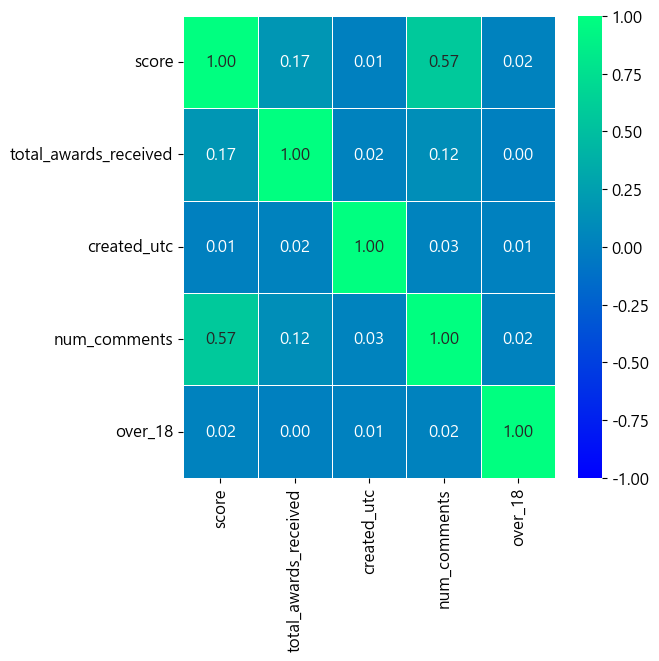

In [56]:
plt.figure(figsize = (6, 6))

sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, fmt = '.2f',
            linewidths = .5, cmap = 'winter')
plt.show()

In [58]:
df3 = pd.read_excel("./data/mtcars.xlsx", index_col='name')
df3.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


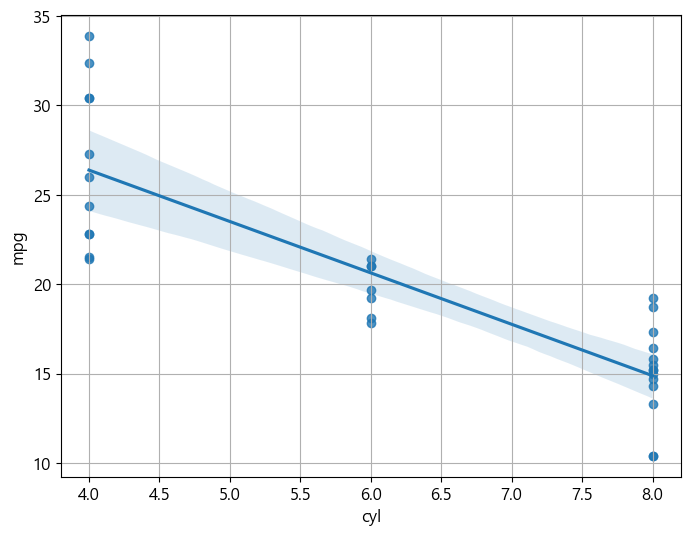

In [59]:
sns.regplot(data=df3, x='cyl', y='mpg')
plt.grid()
plt.show()
plt.close()

In [63]:
s, p = pearsonr(df3['disp'], df3['mpg'])
f"statistic : {s}, p-value : {p}"

'statistic : -0.8475513792624788, p-value : 9.380326537381205e-10'

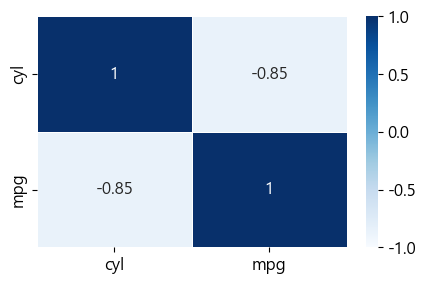

In [65]:
plt.figure(figsize = (5, 3))

corr = df3.filter(['cyl', 'mpg']).corr(method='pearson')

sns.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Blues', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()

- cyl(실린더 수)는 연속형 변수가 아닌 명목형 변수에 가깝기에 피어슨 상관계수보다는 스피어만 상관계수가 더 적합 (결과는 나옴)

In [66]:
df4 = pd.read_csv("./data/kc_house_data.csv")
df4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [67]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [76]:
df4.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [68]:
df4_2 = df4.drop(['id', 'date'], axis = 1)

In [72]:
corr = df4_2.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


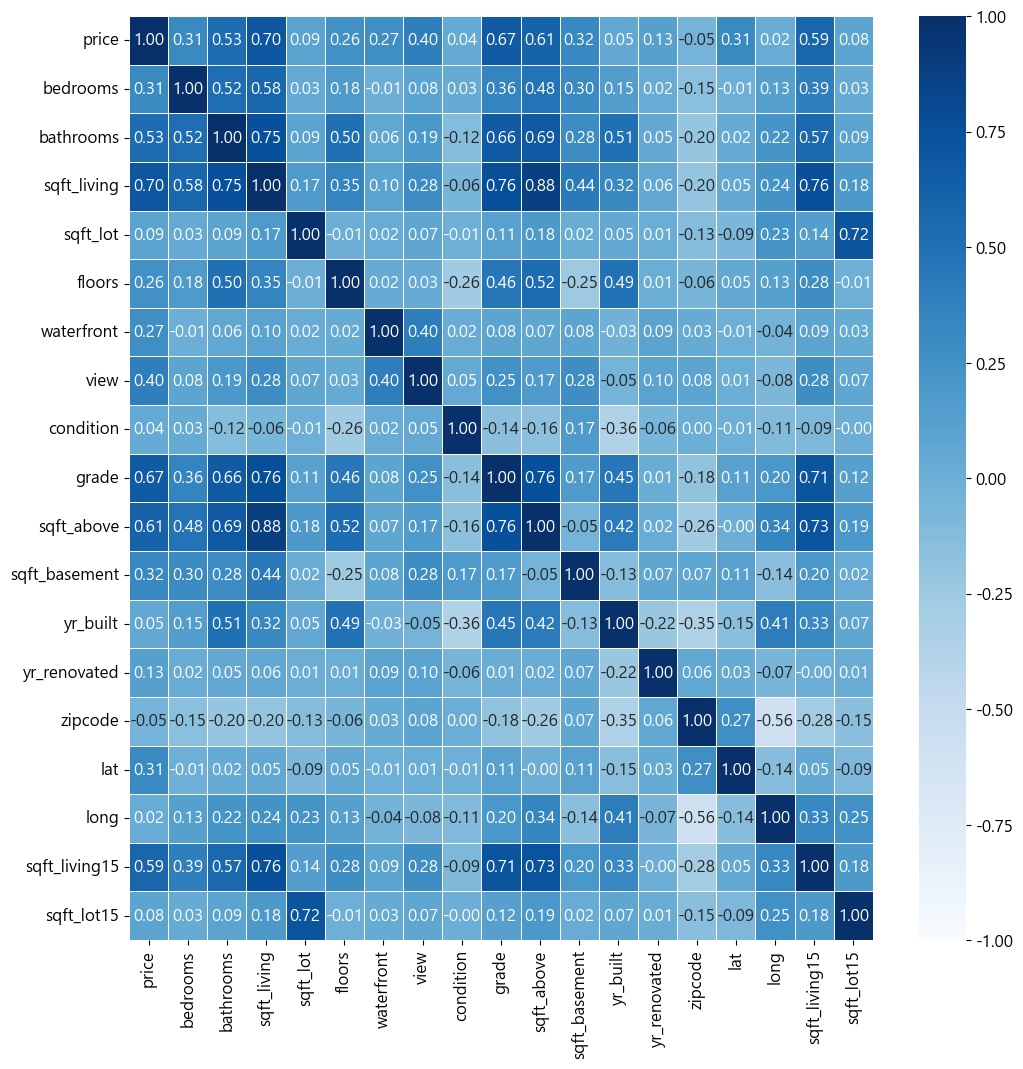

In [75]:
plt.figure(figsize = (12, 12))

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap = 'Blues', fmt = '.2f', linewidths = .5)
plt.show()